In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
df_train=pd.read_csv('data/train.csv')
df_store=pd.read_csv('data/store.csv')

/tmp/ipykernel_14240/1131126083.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('data/train.csv')


## Datacleaning

# train.csv

In [39]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [40]:
df_train.columns=['store',
    'day_of_week',
    'date',
    'sales',
    'customers',
    'open',
    'promo',
    'state_holiday',
    'school_holiday']

In [41]:
df_train['state_holiday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Zu Klassifizieren mit '0':0;'a':1;'b':2;'c':3 

In [42]:
df_train['state_holiday']=df_train['state_holiday'].replace('0',0)
df_train['state_holiday']=df_train['state_holiday'].replace('a',1)
df_train['state_holiday']=df_train['state_holiday'].replace('b',2)
df_train['state_holiday']=df_train['state_holiday'].replace('c',3)

df_train['state_holiday']=df_train['state_holiday'].astype(int)

df_train['state_holiday'].unique()

array([0, 1, 2, 3])

'Date' als Datetime formatieren und Tag Monat und Jahr seperat auslesen.

In [43]:
df_train['date']=pd.to_datetime(df_train['date'])

df_train['year']=df_train['date'].dt.year

df_train['month']=df_train['date'].dt.month

df_train['day']=df_train['date'].dt.day

df_train['week_of_year']=df_train['date'].dt.weekofyear

/tmp/ipykernel_14240/2819681802.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week_of_year']=df_train['date'].dt.weekofyear


Zusatzlich Spalten für Monats- / Jahres- / Quartalsanfang / -ende anlegen.

In [44]:
df_train['is_month_end']=df_train['date'].dt.is_month_end

df_train['is_month_start']=df_train['date'].dt.is_month_start

df_train['is_quarter_end']=df_train['date'].dt.is_quarter_end

df_train['is_quarter_start']=df_train['date'].dt.is_quarter_start

df_train['is_year_end']=df_train['date'].dt.is_year_end

df_train['is_year_start']=df_train['date'].dt.is_year_start

# store.csv

In [45]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [46]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]['CompetitionDistance'].unique()

array([1.070e+03, 3.100e+02, 3.270e+03, 3.240e+03, 1.040e+03, 2.300e+03,
       2.170e+03, 2.910e+03, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       2.050e+03, 2.256e+04, 7.660e+03, 2.500e+02, 1.130e+03, 4.840e+03,
       3.300e+02, 3.320e+03, 7.910e+03, 2.710e+03, 2.410e+03, 2.400e+02,
       1.669e+04, 1.462e+04, 8.980e+03, 1.793e+04, 2.440e+03, 6.190e+03,
       7.890e+03, 4.510e+03, 2.000e+03, 2.460e+03, 9.000e+02, 5.190e+03,
       1.540e+03, 1.657e+04, 2.800e+02, 8.540e+03, 1.780e+03, 1.642e+04,
       3.050e+03, 1.184e+04, 1.254e+04, 2.640e+03, 1.100e+02, 1.309e+04,
       4.130e+03, 3.770e+03, 1.710e+03, 4.800e+02, 1.390e+03, 9.670e+03,
       3.560e+03, 1.936e+04, 8.500e+02, 5.200e+02, 1.697e+04, 2.200e+02,
       2.026e+04, 3.800e+02, 6.870e+03, 1.500e+02, 1.900e+02, 3.150e+03,
       6.400e+02, 7.930e+03, 4.500e+02, 2.370e+03, 1.080e+04, 1.890e+03,
       4.370e+03, 3.200e+02, 6.100e+02, 7.800e+02, 1.310e+03, 3.520e+03,
       3.400e+02, 2.233e+04, 2.100e+02, 4.580e+03, 

In [47]:
df_store[df_store['Promo2']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1113
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      544 non-null    int64  
 1   StoreType                  544 non-null    object 
 2   Assortment                 544 non-null    object 
 3   CompetitionDistance        542 non-null    float64
 4   CompetitionOpenSinceMonth  396 non-null    float64
 5   CompetitionOpenSinceYear   396 non-null    float64
 6   Promo2                     544 non-null    int64  
 7   Promo2SinceWeek            0 non-null      float64
 8   Promo2SinceYear            0 non-null      float64
 9   PromoInterval              0 non-null      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 46.8+ KB


Die Werte für Promo2SinceWeek, Promo2SinceYear und PromoInterval sind genau dann Null, wenn Promo2==0 gilt.
Die Spalten mit Buchstaben auf numerische WErte umsetzen.

In [48]:
#set assortment to numeric values
df_store['Assortment'] = df_store['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

In [49]:
#set storetype to numeric values
df_store['StoreType'] = df_store['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})

df_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [50]:
#convert to snake case
df_store.columns = ['store',
 'storetype',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   store                         1115 non-null   int64  
 1   storetype                     1115 non-null   int64  
 2   assortment                    1115 non-null   int64  
 3   competition_distance          1112 non-null   float64
 4   competition_open_since_month  761 non-null    float64
 5   competition_open_since_year   761 non-null    float64
 6   promo2                        1115 non-null   int64  
 7   promo2_since_week             571 non-null    float64
 8   promo2_since_year             571 non-null    float64
 9   promo_interval                571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [51]:
#set promo_interval to numeric values
df_store['promo_interval'] = df_store['promo_interval'].map({'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3})



<Axes: >

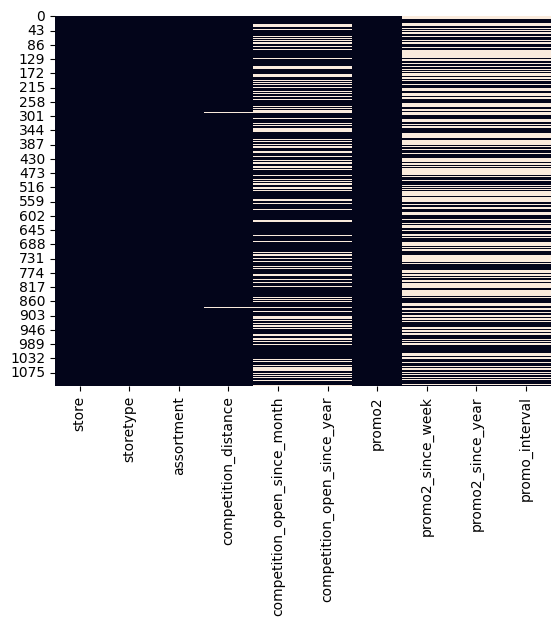

In [52]:
import seaborn as sb 
import matplotlib.pyplot as plt
#heatmap to see missing values
sb.heatmap(df_store.isnull(), cbar=False)

noch viele Missing values, welche ersetzt werden müssen

In [53]:
#fill missing values for promo2_since_week and promo2_since_year and promo_interval
df_store['promo2_since_week'] = df_store['promo2_since_week'].fillna(-1)
df_store['promo2_since_year'] = df_store['promo2_since_year'].fillna(-1)
df_store['promo_interval'] = df_store['promo_interval'].fillna(-1)




In [54]:
#fill missing values for competition_open_since_month and competition_open_since_year with mean
df_store['competition_open_since_month'] = df_store['competition_open_since_month'].fillna(df_store['competition_open_since_month'].mean())
df_store['competition_open_since_year'] = df_store['competition_open_since_year'].fillna(df_store['competition_open_since_year'].mean())
#also fill missing values for competition_distance with mean
df_store['competition_distance'] = df_store['competition_distance'].fillna(df_store['competition_distance'].mean())


<Axes: >

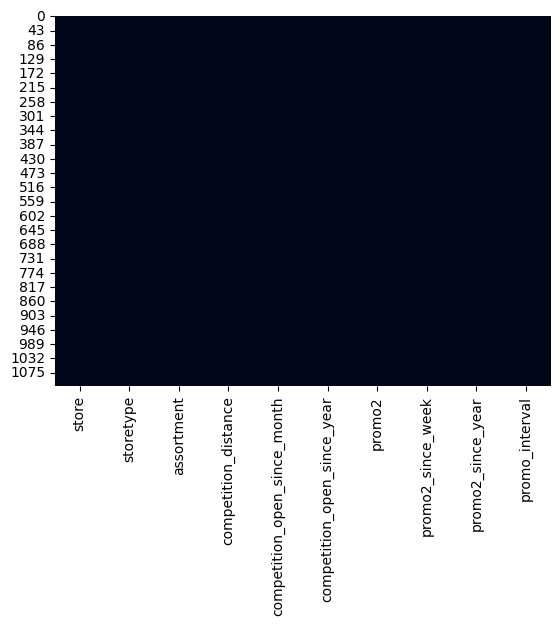

In [55]:
import seaborn as sb 
import matplotlib.pyplot as plt
#heatmap to see missing values
sb.heatmap(df_store.isnull(), cbar=False)


In [56]:
df_store.head()

,store,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


Keine Missing values mehr ! 

# merge train and store data

In [57]:
#merge train and store data
df_train_store = pd.merge(df_train, df_store, how='left', on='store')

In [58]:
df_train_store.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,year,...,is_year_start,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,False,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,False,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,False,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,False,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,False,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


In [59]:
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  int64         
 8   school_holiday                1017209 non-null  int64         
 9   year                          1017209 non-null  int64         
 10  month                         1017209 non-null  int64         
 11

In [60]:
#convert every column to float and drop those you cant convert to float
for col in df_train_store.columns:
    try:
        df_train_store[col] = df_train_store[col].astype(float)
    except:
        df_train_store.drop(col, axis=1, inplace=True)  



df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  float64
 1   day_of_week                   1017209 non-null  float64
 2   sales                         1017209 non-null  float64
 3   customers                     1017209 non-null  float64
 4   open                          1017209 non-null  float64
 5   promo                         1017209 non-null  float64
 6   state_holiday                 1017209 non-null  float64
 7   school_holiday                1017209 non-null  float64
 8   year                          1017209 non-null  float64
 9   month                         1017209 non-null  float64
 10  day                           1017209 non-null  float64
 11  week_of_year                  1017209 non-null  float64
 12  is_month_end                

Um einen Überblick über die Stores zu bekommen, gucken welche art wie oft auftaucht

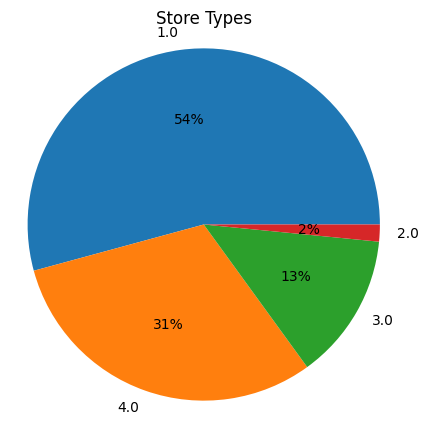

In [61]:
#make a pie chart of the different store types
df_train_store['storetype'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))
plt.axis('equal')
plt.title('Store Types')
plt.ylabel('')
plt.show()

Da keine wirkliche Angabe gemacht wird, was die Store Types Aussagen; nochmal das gleiche für assortments

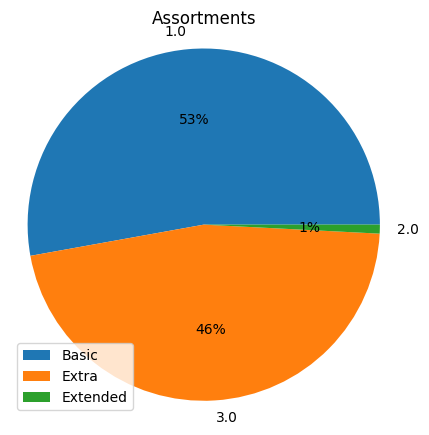

In [62]:
#create a pie chart of the different assortments
df_train_store['assortment'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))
plt.axis('equal')
plt.title('Assortments')
plt.ylabel('')
#make a legend where 1 is basic, 2 is extra and 3 is extended
plt.legend(['Basic', 'Extra', 'Extended'])
plt.show()

Die Art "Extra" wird von Rossmann kaum eingesetzt. Fast ausschließlich basic oder extended

will Plotten wie die Competitiondistance sich auf die Sales auswirkt. Bis jetzt bissl kake

In [63]:
#plot the sales for each store based on the competition distance of the store as a scatter plot
#df_train_store.plot.scatter(x='competition_distance', y='sales', figsize=(10,5))
#plt.title('Sales based on Competition Distance')
#plt.xlabel('Competition Distance')
#plt.ylabel('Sales')
#use smaller dots to make the plot more readable and add a grid 
#plt.scatter(x='competition_distance', y='sales', data=df_train_store, s=0.5)
#plt.grid()
#plt.show()



Es ist mir leider nicht wirklich gelungen den passenden Graphen zu erstellen. Allerdings ist zu erkennen, dass niedrige Comp. Distance mehr Sales mit sich bringt. Dies würde ich damit begründen, dass diese Rossmanns in Einkaufszentren u.Ä. sitzen und somit sowieso viel besucht werden.

Als alternative möchte ich schauen, ob Stores mit naher Competition mehr Werbung machen.

In [64]:
#create a plot showing the frequency of promotions based on competition distance
# first create a new column with the competition distance divided by 1000
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')

#plot the frequency of promotions based on competition distance
#df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(10,5))
#plt.title('Promotions based on Competition Distance')
#plt.xlabel('Competition Distance')
#plt.ylabel('Frequency')

#plt.show()



Ersmtal nicht zu schlecht, aber nach einigen probieren gefällt mir frequency nicht.

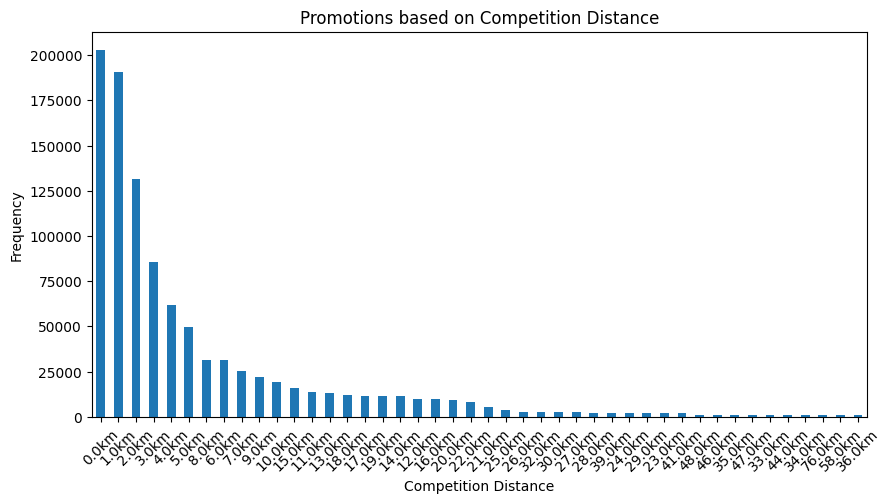

In [65]:
#create a new column with the competition distance divided by 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')
#plot the frequency of promotions based on competition distance
df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Promotions based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
#visually remove the values of the y-axis
#rotate the x-axis labels 45 degrees
plt.xticks(rotation=45)
plt.show()


Da ich Frequency in keinen Sinvolleren Rahmen bekomme, nochmal etwas kosmetik

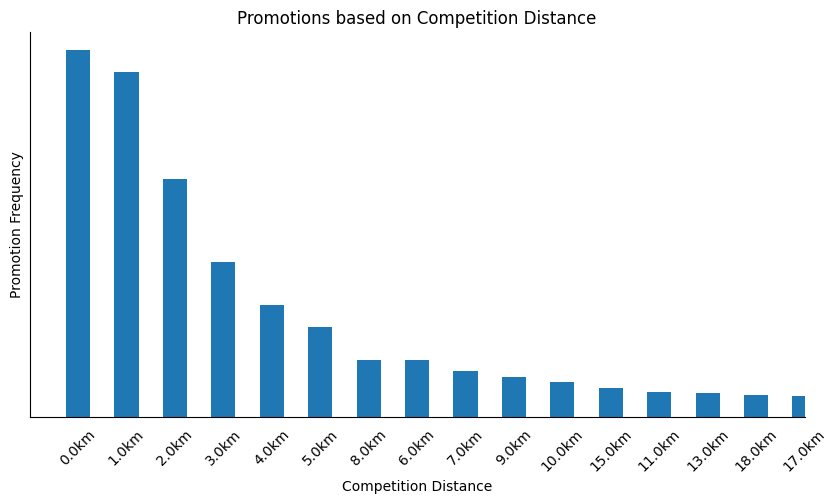

In [66]:
df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')
df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Promotions based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Promotion Frequency')
plt.xticks(rotation=45)
#remove the last 15 values of the x-axis
plt.xlim(-1, 15)
#remove the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#also remove the ticks on the y-axis and x-axis
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=True)
plt.show()


JETZT HEATMAP UND DECISION TREE

/tmp/ipykernel_14240/261261729.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train_store.corr()


<Axes: >

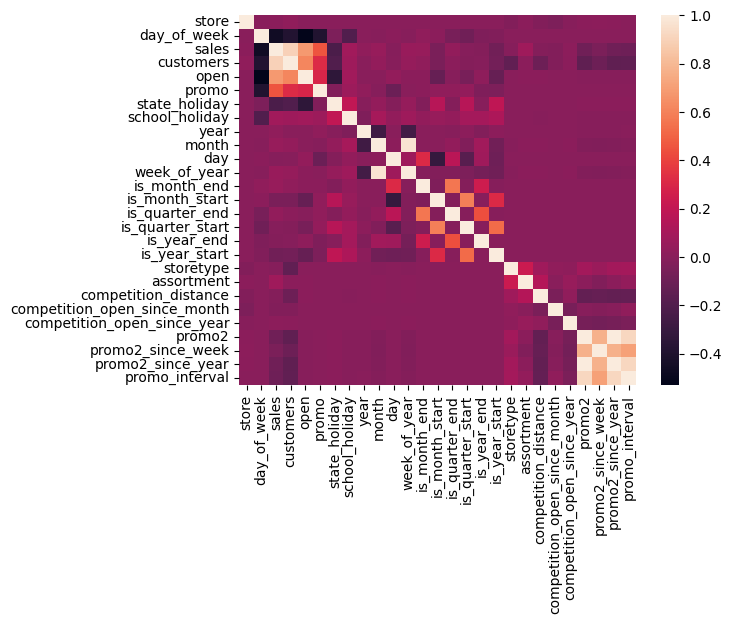

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = df_train_store.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



Da Competiotion Distance 1000, in vorherigen versuchen zu Trainieren, ärger macht; versuch den richtigen datentyp zu erreichen 

In [68]:
#divide Competition_Distance_1000 into 5 categories and create a new column with the categories 
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')

#convert Competition_Distance_1000 to a float 
#df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(float)

#df_train_store.info()

Wird nichts "ValueError: could not convert string to float: '1.0km" , aus mit competition_distance_1000

In [69]:
#drop competition_distance_1000
df_train_store.drop('competition_distance_1000', axis=1, inplace=True)
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  float64
 1   day_of_week                   1017209 non-null  float64
 2   sales                         1017209 non-null  float64
 3   customers                     1017209 non-null  float64
 4   open                          1017209 non-null  float64
 5   promo                         1017209 non-null  float64
 6   state_holiday                 1017209 non-null  float64
 7   school_holiday                1017209 non-null  float64
 8   year                          1017209 non-null  float64
 9   month                         1017209 non-null  float64
 10  day                           1017209 non-null  float64
 11  week_of_year                  1017209 non-null  float64
 12  is_month_end                

In [70]:
#first import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
features = corr['sales'][(corr['sales']>.02) | (corr['sales']<-.02)].index
features = features.drop('sales')

X = df_train_store[features]
y = df_train_store['sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dtc = DecisionTreeRegressor()
dtc = dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(Y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, y_pred))
print('R2 Score: ', r2_score(Y_test, y_pred))



Mean Squared Error:  1673425.707415272
Mean Absolute Error:  788.3573919511867
R2 Score:  0.8873454710940418


In [71]:
#predict sales with random forest regressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

features = corr['sales'][(corr['sales']>.02) | (corr['sales']<-.02)].index
features = features.drop('sales')

X = df_train_store[features]
y = df_train_store['sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(n_estimators=100, max_depth=3)
rfr = rfr.fit(X_train, Y_train)
y_pred = rfr.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(Y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, y_pred))
print('R2 Score: ', r2_score(Y_test, y_pred))



Mean Squared Error:  2721366.6064640805
Mean Absolute Error:  1092.1183524353048
R2 Score:  0.8159845754293098


logistical regression

In [72]:
#predict sales with logistic regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

features = corr['sales'][(corr['sales']>.02) | (corr['sales']<-.02)].index
features = features.drop('sales')

X = df_train_store[features]
y = df_train_store['sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr = lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(Y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, y_pred))
print('R2 Score: ', r2_score(Y_test, y_pred))



Mean Squared Error:  2072034.8198643876
Mean Absolute Error:  974.5744607385802
R2 Score:  0.8598915830756038
